<a href="https://colab.research.google.com/github/rioAgustian/computational_physics/blob/main/animasi_monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Animasi Simulasi Monte Carlo untuk Mengestimasi Nilai $\pi$**

**Rio Agustian Gilang Fernando, Fisika**

**FMIPA Universitas Negeri Semarang**

**2024**

## **Dasar Teori**

\begin{align}
        \text{Luas lingkaran} = \pi r^2
    \end{align}

Bila $r = 1$ maka

\begin{align}
        \text{Luas lingkaran} = \pi
    \end{align}

Apabila terdapat titik-titik yang tersebar secara acak pada persegi yang memiliki luasan yang dibatasi oleh x1=0, x2=2, y1=0, dan y2=2, maka luasan lingkaran yang memiliki titik pusat (1,1) dan jari-jari 1 satuan adalah

\begin{align}
        \text{Luas lingkaran} &= \frac{\text{banyak titik di dalam lingkaran}}{\text{banyak titik total}} \times \text{luas persegi} \\
        \pi &= \frac{\text{banyak titik di dalam lingkaran}}{\text{banyak titik total}} \times 4
    \end{align}

Untuk mengecek apakah suatu titik berada di dalam lingkaran atau di luar lingkaran dapat digunakan algoritma sederhana berikut



```
x = bilangan acak antara 0 dan 2
y = bilangan acak antara 0 dan 2
k = (x-1)^2 + (y-1)^2

Jika k <= 1:
  k adalah titik yang berada di dalam lingkaran
Jika k > 1:
  k adalah titik yang berada di luar lingkaran
```



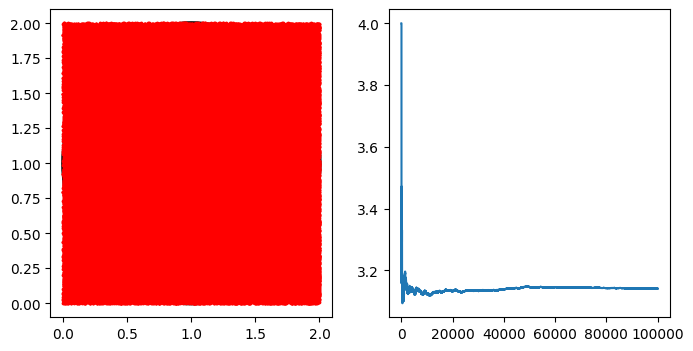

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n_sample = 1000 #banyak sampel yang digunakan

#pemilihan titik secara acak
x = np.random.uniform(low=0.0, high=2.0, size=(n_sample))
y = np.random.uniform(low=0.0, high=2.0, size=(n_sample))

# persamaan lingkaran dengan titik pusat di (1,1) dan r=1
def circ(x, y):
  return ((x-1)**2+(y-1)**2)

count = 0       #nilai titik yang berada di dalam lingkaran
square_area = 4 #luas persegi, yaitu 2x2 satuan
area_value = [] #nilai luas lingkaran
for i in range(1, n_sample+1):
  k = circ(x[i-1],y[i-1])
  if k<=1**2: #nilai k<=1 artinya titik ada di dalam lingkaran
    count += 1
    area = count/i * square_area
    area_value.append(area)
  else:       #nilai k>1 artinya titik ada di luar lingkaran
    count += 0
    area = count/i * square_area
    area_value.append(area)

circ_area_numerical = count/n_sample * square_area #nilai pi numerik
circ_area_analytical = np.pi * 1**2                #nilai pi analitik

#visualisasi
fig = plt.figure(figsize=(8,4))

#grafik sebaran titik pada lingkaran
circle = plt.Circle((1, 1), 1, lw=3, fill=False)
ax1 = fig.add_subplot(121)
ax1.add_patch(circle)
ax1.scatter(x,y,s=3,color="red")

#grafik konvergensi nilai pi
ax2 = fig.add_subplot(122)
ax2.plot(range(n_sample), area_value)
# plt.show()

In [ ]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(12,5))
circle = plt.Circle((1, 1), 1, lw=3, fill=False)
ax1 = plt.subplot(1,2,1)
ax1.add_patch(circle)
ax1.set_xlim((0, 2))
ax1.set_ylim((0, 2))

ax2 = plt.subplot(122)
ax2.set_ylim((2, 4))
ax2.set_xlabel("Jumlah sampel")

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title1 = ax1.set_title('')
txt_title2 = ax2.set_title('')
scatter1 = ax1.scatter([], [], color='red')
line2, = ax2.plot([], [], 'b', lw=2)

# animation function. This is called sequentially
def drawframe(n):
    x1 = x[0:n]
    y1 = y[0:n]
    x2 = range(n)
    y2 = area_value[:n]
    rerr = abs(area_value[n]-3.1415)/3.1415 * 100
    scatter1.set_offsets(np.vstack((x1, y1)).T)
    line2.set_data(x2, y2)
    ax2.set_xlim((1, n))
    txt_title1.set_text('Jumlah sampel = {0:4d}'.format(n))
    txt_title2.set_text(r'Estimasi $\pi$ = {0:.4f}, Error = {0:.4f} %'.format(area_value[n],rerr))
    return (scatter1,line2)

anim = animation.FuncAnimation(fig, drawframe, frames=1000, interval=50, blit=True)
HTML(anim.to_html5_video())

<ipython-input-14-1ff1910e4f33>:32: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax2.set_xlim((1, n))
